#### Exercise 1: Modelling a Two-way Reaction to Understand Equilibrium

This exercise is very similar to the example of the one-way reaction, we just need to add a term to reflect the reverse direction of the reaction

**Exercise 1a)**

The first exercise is to set up the ODE-system for the following reaction
$$\mathrm{Mb} + \mathrm{O_2} \underset{k_-}{\overset{k_+}{\rightleftharpoons}} \mathrm{MbO_2}.$$
The ODE-system will be:
$$\frac{{\rm d}[\mathrm{Mb}]}{{\rm d}t} = -k_+[\mathrm{Mb}][\mathrm{O_2}] + k_-[\mathrm{MbO}_2],$$

$$\frac{{\rm d}[\mathrm{O}_2]}{{\rm d}t} = -k_+[\mathrm{Mb}][\mathrm{O_2}] + k_-[\mathrm{MbO}_2],$$

$$\frac{{\rm d}[\mathrm{MbO}_2]}{{\rm d}t} = k_+[\mathrm{Mb}][\mathrm{O_2}] - k_-[\mathrm{MbO}_2].$$
Note that all three states have the same derivative, but with opposite signs.


**Exercise 1b)**

Here we are supposed to define the RHS function in Python. We do this by writing out the ODE system we just set up

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [60]:
def rhs(y, t, kp, km):
    Mb, O2, MbO2 = y
    
    dMb_dt = -kp*Mb*O2 + km*MbO2
    dO2_dt = -kp*Mb*O2 + km*MbO2
    dMbO2_dt = +kp*Mb*O2 - km*MbO2

    return (dMb_dt, dO2_dt, dMbO2_dt)

# **Exercise 1c)**

Now we need to use `odeint` to solve the system we just made. We make up some parameters: $k_+ = 1.1$ and $k_- = 0.7$. Finally we will plot the solution.


In [86]:
# Define time points to solve for
dt = 0.001
T = 1
time = np.arange(0, T, dt)

# Set initial conditions as a vector
Mb_0 = 1.0
O2_0 = 5.0
MbO2_0 = 0.0
y0 = (Mb_0, O2_0, MbO2_0)

# Define my parameters as a vector
kp = 2.2
km = 0.7
params = (kp, km)

# Solve the ODE system
solutions = odeint(rhs, y0, time, params)

# Split up the solution matrix
Mb, O2, MbO2 = np.hsplit(solutions, 3)

Now we are ready to plot our solutions

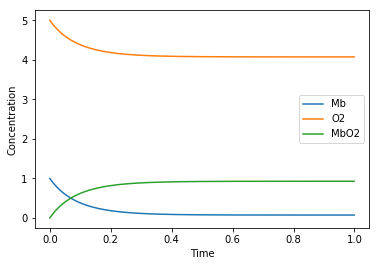

In [87]:
plt.plot(time, Mb)
plt.plot(time, O2)
plt.plot(time, MbO2)

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(['Mb', 'O2', 'MbO2'])

plt.show()

**Exercise 1d)**

We now want to compute the equilibrium by hand and verify that it matches our numerical solution. We see the equilibrium value in our plot, but to get it as accurately as possible, we can print out the final values of our arrays using `Mb[-1]`, `O2[-1]` and `MbO2[-1]`, here `[-1]` means the final value of an array.

In [88]:
print("From numerical solution:")
print("[Mb] at equilibrium:  ", Mb[-1])
print("[O2] at equilibrium:  ", O2[-1])
print("[MbO2] at equilibrium:", MbO2[-1])

From numerical solution:
[Mb] at equilibrium:   [0.07251025]
[O2] at equilibrium:   [4.07251025]
[MbO2] at equilibrium: [0.92748975]


So we see that at equilibrium, 92% of the myoglobin has oxygen bound to it.

To find the equilibrium by hand we use the our original ODE-system and set the time derivative to zero:
$$\frac{{\rm d}[\mathrm{MbO}_2]}{{\rm d}t} = k_+[\mathrm{Mb}][\mathrm{O_2}] - k_-[\mathrm{MbO}_2] = 0.$$
Which gives
$$k_+[\mathrm{Mb}][\mathrm{O_2}] = k_-[\mathrm{MbO}_2],$$
or
$$\frac{[\mathrm{Mb}][\mathrm{O_2}]}{[\mathrm{MbO}_2]} = \frac{k_-}{k_+} = K_{\rm d}.$$
In our case, we have
$$K_{\rm d} = \frac{0.7}{2.2} = 0.318.$$


In [89]:
print((Mb[-1]*O2[-1])/MbO2[-1])

[0.3183849]


So we see that our predictions agrees with our numerical solution.

Finally: What happens if we double $k_+$, keeping $k_-$ the same?
$$K_{\rm d} = \frac{0.7}{4.4} = 0.159.$$
Because $K_{\rm d} = k_-/k_+$, we see that doubling $k_+$ means $K_{\rm d}$ becomes half, this means we expect the equilibrium to be pushed towards more oxygen becoming bound. You can recompute your solution with changed parameters to see that this is the case.

If you recompute with the doubled $k_+$ you see that we go from having 92% oxygen-bound to 96% - a very tiny change. This is because the equilibrium is already pushed so much towards one side, that adding even more $k_+$ does little. If you chose different parameters, the doubling of $k_+$ might have a more dramatic shift.

#### Exercise 2: Modeling Michaelis-Menten Kinetics

Let us model the Michaelis-Menten reaction and analyse the behavior
$${\rm S} + {\rm E} \underset{k_{-1}}{\overset{k_1}{\rightleftharpoons}} {\rm ES} \overset{k_2}{\rightarrow} {\rm E} + {\rm P}.$$

**Exercise 2a)**

Using the law of mass action, we write out the system of ODEs that describe the four concentrations $[{\rm S}]$, $[{\rm E}]$, $[{\rm ES}]$, $[{\rm P}]$. These become:

$$\frac{{\rm d[S]}}{{\rm d}t} = -k_1{\rm [S][E]} + k_{-1}{\rm [ES]}.,$$

$$\frac{{\rm d[E]}}{{\rm d}t} = -k_1{\rm [S][E]} + k_{-1}{\rm [ES]} + k_{2}{\rm [ES]} = -k_1{\rm [S][E]} + (k_{-1} + k_2){\rm [ES]},$$

$$\frac{{\rm d[ES]}}{{\rm d}t} = k_1{\rm [S][E]} - k_{-1}{\rm [ES]} - k_{2}{\rm [ES]} = k_1{\rm [S][E]} - (k_{-1} + k_2){\rm [ES]},$$

$$\frac{{\rm d[P]}}{{\rm d}t} = k_2{\rm [ES]}.$$

Note that when we derived the speed of the reaction we didn't need all of these, but if we want to solve the ODE-system for all states, we need to specify all 4.

#### Exercise 2b)

We now implement the RHS of the system as a function. The input `y` is a vector of all four states, and the returned value must be a vector of the derivatives of the four states in the same order as the input

In [45]:
def rhs(y, t, k1m, k1p, k2):
    S, E, ES, P = y
    
    dS_dt = -k1p*S*E + k1m*ES
    dE_dt = -k1p*S*E + (k1m + k2)*ES
    dES_dt = +k1p*S*E - (k1m + k2)*ES
    dP_dt = k2*ES
    
    return (dS_dt, dE_dt, dES_dt, dP_dt)

**Exercise 2c)**

Solve the system with the rates $k_{-1} = 1$, $k_1 = 2$, $k_2 = 3$. Let $[{\rm S}]_0 = 1$ and $[{\rm E}]_0 = 0.1$. Solve the system for $t\in[0, 30]$.

In [49]:
# Specify parameters
k1m = 1
k1p = 2
k2 = 3
param = (k1m, k1p, k2)

# Initial conditions
S0 = 1
E0 = 0.1
ES0 = 0.0
P0 = 0.0
y0 = (S0, E0, ES0, P0)

# Time array
dt = 0.001
T = 30
time = np.arange(0, T, dt)

# Solve ODE-system
solutions = odeint(rhs, y0, time, param)

# Split solution-matrix into 4 vectors
S, E, ES, P = np.hsplit(solutions, 4)

**Exercise 2d)**

Make two plots, in the first include the curves for the substrate and product, in the second plot the curves of bound and free enzyme.

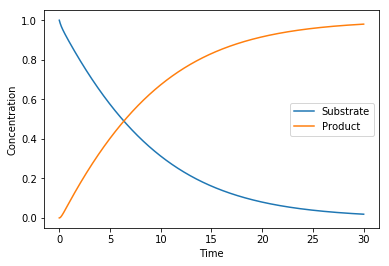

In [50]:
plt.plot(time, S)
plt.plot(time, P)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(["Substrate", "Product"])
plt.show()

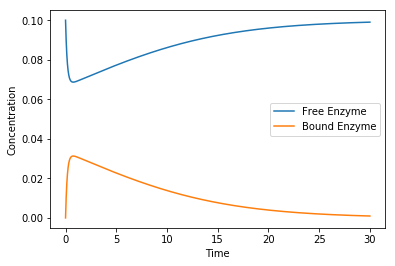

In [51]:
plt.plot(time, E)
plt.plot(time, ES)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(["Free Enzyme", "Bound Enzyme"])
plt.show()

**Exercise 2e)**

As a verifictation, let us make sure our solution is mass conserving. We know that the total amount of enzyme $[\rm E] + [\rm ES]$ and the total amount of substrate and product $\rm [S] + [P] + [ES]$ must both be constant. Plot these curves and ensure that they are constant. (Note that there was an error in the exercise text:  $\rm [S] + [P]$ isn't necessarily constant, because some substrate is bound in the ES complex.)

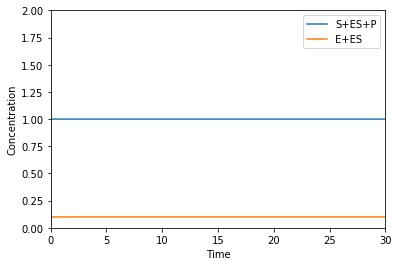

In [52]:
plt.plot(time, S + ES + P)
plt.plot(time, E + ES)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.axis((0, T, 0, 2))
plt.legend(("S+ES+P", "E+ES"))
plt.show()

#### Exercise 2f)

The Michaelis-Menten gives the reaction velocity of the enzyme activity as
$$v = v_{\rm max} \frac{[S]}{K_{\rm m} + [S]}, \qquad v_{\rm max} = k_2 [E]_{\rm tot}, \qquad K_{\rm m} = \frac{k_{-1} + k_2}{k_1}.$$

Let us compare our numerical solution to this equation. To find the reaction velocity, we use the fact that 
$$v = [\dot{\rm P}] = k_2[{\rm ES}].$$

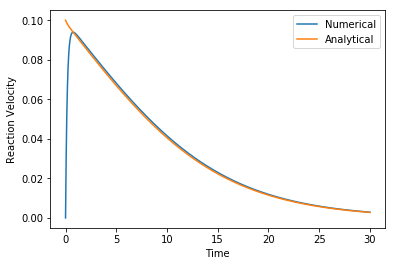

In [54]:
vmax = k2*(E0 + ES0)
Km = (k1m + k2)/k1p

numerical_v = k2 * ES
analytical_v = vmax*S/(Km + S)

plt.plot(time, numerical_v)
plt.plot(time, analytical_v)
plt.xlabel('Time')
plt.ylabel('Reaction Velocity')
plt.legend(("Numerical", "Analytical"))
plt.show()

Finally we are asked to compare the two solutions and explain any differences we observe. We see that the two curves agree nicely, except for the first millisecond or two. This is because, to derive the Michaelis-Menten equation, we assumed everything to occur *quasistatically*, i.e., that the enzyme concentration $[\rm E]$ was always at equilibrium. This assumption is not included in the modeling, and thus not included in the numerical solutuion. We see that our quasistatic assumption (or approximation) is quite good for most of the time course, it is only right at the start, when the substrate is added, that we need some time for the enzyme to start working.